# **3 Figures and Tables**

## 3.1 Preparations

In [1]:
import json
import os
import zipfile
import numpy as np
import geopandas as gpd
import sklearn
import torch
import matplotlib.pyplot as plt
import torchvision
import importlib
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

In [2]:
print(f"PyTorch version: {torch.__version__}\nTorchvision version: {torchvision.__version__}")

from torch import nn

PyTorch version: 2.5.1+cu124
Torchvision version: 0.20.1+cu124


In [3]:
print("CUDA available:", torch.cuda.is_available())
print("CUDA Version:", torch.version.cuda)
print("Number of GPUs:", torch.cuda.device_count())
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU identified")

CUDA available: False
CUDA Version: 12.4
Number of GPUs: 0
GPU Name: No GPU identified


In [4]:
# use gpu if available
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [5]:
import os
print(os.path.abspath("configs"))

/home/sc.uni-leipzig.de/rf37uqip/MoSE/notebooks/configs


In [6]:
# path to repository folder
import sys
sys.path.append(os.path.abspath('/home/sc.uni-leipzig.de/rf37uqip/MoSE/'))

In [7]:
# import configs.py-file
from configs import configs_sc
importlib.reload(configs_sc) # reload changes

<module 'configs.configs_sc' from '/home/sc.uni-leipzig.de/rf37uqip/MoSE/configs/configs_sc.py'>

In [8]:
# input directories: patches and masks
patches_dir = configs_sc.DATA_DIR["patches"]
masks_dir = configs_sc.DATA_DIR["masks"]

# output directories: trained models
models_dir = configs_sc.DATA_DIR["models"]

# additional directories: class (labels and) codes
# labels_dir = configs_sc.DATA_DIR["labels"]
codes_dir = configs_sc.DATA_DIR["codes"]

figures_dir = configs_sc.DATA_DIR["figures"]

In [9]:
# import data_utils.py helper-functions script
from scripts import data_utils
importlib.reload(data_utils) # reload changes

# import model_utils.py helper-functions script
from scripts import model_utils
importlib.reload(model_utils) # reload changes

# import train_utils.py helper-functions script
from scripts import train_utils
importlib.reload(train_utils) # reload changes

# import evaluation_utils.py helper-functions script
from scripts import evaluation_utils
importlib.reload(evaluation_utils) # reload changes

# import visualization_utils.py helper function script
from scripts import visualization_utils
importlib.reload(visualization_utils) # reload changes

<module 'scripts.visualization_utils' from '/home/sc.uni-leipzig.de/rf37uqip/MoSE/scripts/visualization_utils.py'>

## 3.2 Figures and Tables

In [10]:
image_names = [
    "class_1.png",  
    "class_2.png",
    "class_3.png",
    "class_4.png"
]

image_paths = [os.path.join(figures_dir, name) for name in image_names]

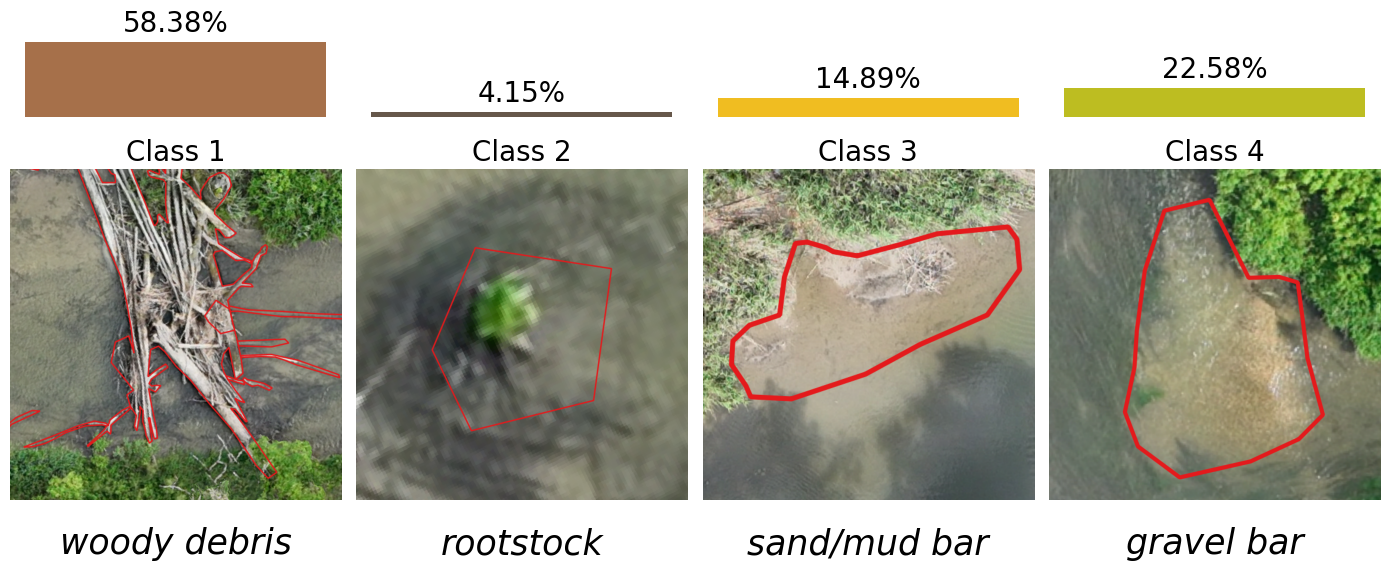

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# input images
image_names = ["class_1.png", "class_2.png", "class_3.png", "class_4.png"]
class_labels = ["woody debris", "rootstock", "sand/mud bar", "gravel bar"]
pixel_counts = [16775966, 1193945, 4278661, 6488206]  # absolute number of pixels per class
custom_colors = configs_sc.HYPERPARAMETERS["custom_colors"][-4:]
image_dir = figures_dir

# total number of pixels (of all classes)
total_pixels = sum(pixel_counts)

# Percentage of each class in the total number
percentages = [(p / total_pixels) * 100 for p in pixel_counts]

# create plot
fig, axes = plt.subplots(2, len(image_names), figsize=(14, 6), height_ratios=[2, 10])

for i, (img_name, label, percent, abs_pixels) in enumerate(zip(image_names, class_labels, percentages, pixel_counts)):
    
    # load image
    img_path = os.path.join(image_dir, img_name)
    img = Image.open(img_path)

    # Top bar (vertical)
    ax_bar = axes[0, i]
    ax_bar.bar(0, percent, color=custom_colors[i], width=0.5)
    ax_bar.set_ylim(0, max(percentages) * 1.3)  # etwas Luft nach oben
    ax_bar.axis("off")

    # percentage number on top of the bars in black 
    ax_bar.text(0, percent + max(percentages) * 0.05, f"{percent:.2f}%", 
                ha="center", va="bottom", fontsize=20, color="black")

    # image below
    ax_img = axes[1, i]
    ax_img.imshow(img)
    ax_img.axis("off")
    
    # class number on top
    ax_img.set_title(f"Class {i+1}", fontsize=20)

    # class name in italics below
    ax_img.text(0.5, -0.08, f"{label}", transform=ax_img.transAxes,
                ha="center", va="top", fontsize=25, style="italic")

# save the figure in folder
output_path = os.path.join(figures_dir, "fig_classes.png")
plt.tight_layout()
plt.savefig(output_path)

plt.tight_layout()
plt.show()
